<a href="https://colab.research.google.com/github/rosesardina/ECE61000-EnergyConversion/blob/main/single_phase_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook created by:<br>
Dionysios Aliprantis  |  Professor of
Electrical and Computer Engineering, Purdue University<br>
465 Northwestern Ave., West Lafayette, Indiana 47907-2035<br>
765.494.4434  |  dionysis@purdue.edu<br>
https://engineering.purdue.edu/~dionysis/<br>

Revision: September 10, 2021

Note: This notebook is intended for use by students of ECE 61000 Energy Conversion at Purdue University. The material is subject to change without notice. Unless otherwise noted, figures are obtained from the course textbook: P. Krause, O. Wasynczuk, S. Sudhoff, and S. Pekarek, *Analysis of Electric Machinery and Drive Systems*, Third edition, 2013, Wiley-IEEE Press.

---

# Single-phase transformer: Modeling and simulation

*Objectives:*

* Formulate the dynamic equations of a single-phase transformer with magnetic saturation, and simulate its transient response.

*Prerequisites:*

* General interest in power systems engineering and electromechanical devices ;)
* Complete the previous Jupyter notebooks.
* Watch the lecture videos of the Electromechanical Energy Conversion/Magnetic Circuits subsection.

<br>


---




## System modeling

We will analyze the dynamic performance of a single-phase transformer (see textbook, Fig. 1.2-1, page 2).
To make the study more realistic, we shall model the saturation of the magnetizing flux path.

![magnetically coupled circuits](https://drive.google.com/uc?id=1eNCnvyOBrjq6grnJqFcUu7yfefTF-oUl)

In the lectures, we  analyzed this device starting from the magnetic equivalent circuit, and we derived the electrical T-equivalent circuit shown below (see textbook, Fig. 1.2-2, page 7):

![T-equivalent circuit](https://drive.google.com/uc?id=1ufY6-n3lx-fVKyUHz2EOW84x-3Q6Tccq)


The system parameters are based on the ones given in Example 1A:
* primary resistance $r_1 = 12~\Omega$
* secondary resistance $r_2' = 10~\Omega$
* primary leakage inductance $L_{l1} = 27.1$ mH
* secondary leakage inductance $L_{l2}' = 27.1$ mH
* magnetizing inductance $L_{m1} = 262.9$ mH (for the linear regime)

### Transformer dynamic equations

To represent the saturation of the core, we will represent the magnetizing flux linkage as
$$
\lambda_m = L_{m1}(i_m) \cdot i_m \,,
$$
where the magnetizing current is
$$
i_m = i_1 + i'_2 \,.
$$
We introduced a function $L_{m1}(i_m)$ for the *magnetizing inductance* (i.e., the inductance of the vertical branch).

The time derivative of the magnetizing flux linkage is
\begin{align}
p\lambda_m &= p(L_{m1} i_m) = pL_{m1} \cdot i_m + L_{m1} \cdot pi_m \\
&= \left( \frac{dL_{m1}}{di_m} i_m  + L_{m1} \right)  \cdot pi_m \\
&= L_{mi} \, pi_m \,,
\end{align}
where we defined the *incremental magnetizing inductance*
$$
L_{mi}(i_m) = \frac{d\lambda_m(i_m)}{di_m} = \frac{dL_{m1}(i_m)}{di_m} i_m  + L_{m1}(i_m) \,.
$$
This incremental inductance represents the slope of the $\lambda_m$-$i_m$ curve.

We may incorporate this result in the voltage equations as follows,
\begin{align}
v_1 &= r_1 i_1 + L_{l1} p i_1 + p\lambda_m \\
&= r_1 i_1 + (L_{l1} + L_{mi}) \,pi_1 + L_{mi}\, pi_2 \\
v'_2 &= r'_2 i'_2 + L'_{l2} p i'_2 + p\lambda_m \\
&= r'_2 i'_2 + L_{mi}\, pi_1 + (L'_{l2} + L_{mi})\, pi'_2 \,.
\end{align}

Suppose that the primary side is connected to an ac voltage source
$$
v_1 =  V_{\text{src}} \cos(\omega_e t + \theta_{e0}) \,,
$$
and that the secondary side is connected to an ohmic load with resistance $r$, so that $v_2 = - r i_2$.
Reflecting this to the primary side yields $v'_2 = - r' i'_2$, with $r' = (N_1/N_2)^2 r$.

The circuit dynamics are then
$$
\begin{bmatrix}
L_{l1} + L_{mi} & L_{mi} \\
L_{mi} & L'_{l2} + L_{mi}
\end{bmatrix} \, p \begin{bmatrix}
i_1 \\ i'_2
\end{bmatrix} = \begin{bmatrix}
-r_1 & 0 \\
0 & - (r' + r'_2)
\end{bmatrix} \begin{bmatrix}
i_1 \\ i'_2
\end{bmatrix} + \begin{bmatrix}
v_1 \\ 0
\end{bmatrix} \,,
$$
or
$$
\mathbf{L} p\mathbf{i} = - \mathbf{r} \mathbf{i} + \mathbf{v} \,,
$$
leading to
$$
p\mathbf{i} = - \mathbf{L}^{-1} \mathbf{r} \mathbf{i} + \mathbf{L}^{-1} \mathbf{v} \,.
$$
The inverse of the 2-by-2 inductance matrix is
$$
\mathbf{L}^{-1} = \frac{1}{L_{l1} L'_{l2} + L_{l1} L_{mi} + L'_{l2} L_{mi}}
\begin{bmatrix}
L'_{l2} + L_{mi}  & -L_{mi} \\
-L_{mi} & L_{l1} + L_{mi}
\end{bmatrix} \,.
$$
Of course, this matrix is not constant, and needs to be updated continuously, since $L_{mi}$ depends on the currents.

### Saturation modeling

Note that the dynamic equation above depends only on the incremental inductance $L_{mi}$, and not on the  $\lambda_m$-$i_m$ characteristic per se.
In the absence of  actual $\lambda_m$-$i_m$ curve measurements, we shall generate a synthetic incremental inductance profile that smoothly changes slope from $L_{mi,0}$ close to the origin to a lower value $L_{mi,\text{sat}}$ at higher current levels.
We model this as follows:
$$
L_{mi}(i_m) = c(i_m) \cdot L_{mi,0} + (1 - c(i_m))\cdot L_{mi,\text{sat}} \,,
$$
where
$$
c(i_m) = \exp\left\{-\left(\frac{i_m}{i_\text{knee}}\right)^2 \right\} \,.
$$
The parameters $L_{mi,0}$, $L_{mi,\text{sat}}$,  and $i_\text{knee}$ can be adjusted to create different curves, or to better fit experimental data, if available.

### Import Python libraries

In [ ]:
# Import libraries we need to calculate
import numpy as np
import scipy.integrate as spint

# Import plotting library and set defaults
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
#sns.set_context("talk")
#plt.style.use("dark_background")

### Define device parameters

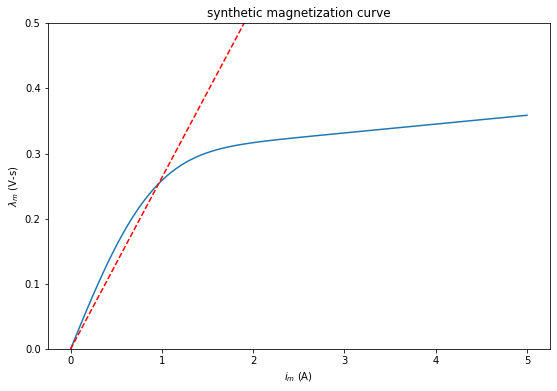

In [ ]:
# define device parameters (see page 8)
r_1        =  12 # primary resistance (ohm)
r_2p       =  10 # secondary resistance, reflected to primary (ohm)
L_l1       =  27.1e-3 # primary inductance (H)
L_l2p      =  27.1e-3 # secondary inductance, reflected to primary (H)
L_m1       =  262.9e-3 # magnetizing inductance (linear regime, H)
r_lp       =  50 # load resistance, reflected to primary (ohm)
V_src      =  np.sqrt(2)*120 # source voltage (V, peak)
f          =  60 # source frequency (Hz)
w_e        =  2*np.pi*f # source frequency (rad/s)
theta_e0   = -np.pi/2 # voltage source phase (rad)

# synthetic magnetization curve parameters
i_m_data   =  np.linspace(0,5,100)
L_mi0      =  1.3*L_m1 # incremental magnetizing inductance at the origin (H)
L_misat    =  0.5*L_l1 # incremental magnetizing inductance at full saturation (H)
i_knee     =  1 # knee of lambda-i curve (A)
c          =  lambda i: np.exp(-(i/i_knee)**2)
L_mi       =  lambda i: c(i)*L_mi0 + (1-c(i))*L_misat
lam_synth  =  spint.cumtrapz(L_mi(i_m_data), i_m_data, initial=0)

plt.figure(figsize=(9,6))
plt.plot(i_m_data,lam_synth)
plt.plot(i_m_data,L_m1*i_m_data,'r--')
plt.ylim([0,0.5])
plt.xlabel(r'$i_m$ (A)')
plt.ylabel(r'$\lambda_m$ (V-s)')
plt.title(r'synthetic magnetization curve');

### Calculate the transient response

Our problem is of the form:
$$
p\mathbf{y} = \mathbf{f}(\mathbf{y}, t) ~~\text{with}~~\mathbf{y}(0) = \mathbf{0} \,.
$$

We will use the solve_ivp function from scipy.integrate to obtain a numerical solution to our initial value problem.
For more information about this, please refer to the online documentation: https://docs.scipy.org/doc/scipy/reference/integrate.html


In [ ]:
# voltage source
def v(t):
  return V_src*np.cos(w_e*t + theta_e0)

# derivative function
R = np.diag([r_1, r_2p + r_lp])
def fun(t, y, Lx = ''):
  u = np.array([v(t), 0])
  i_m = y[0] + y[1]

  if Lx == '':
    Lx = L_mi(i_m)

  denom = L_l1*Lx + L_l2p*Lx + L_l1*L_l2p
  Linv = 1/denom*np.array([[L_l2p + Lx, -Lx],
                           [-Lx, L_l1 + Lx]])
  py = -np.linalg.multi_dot([Linv,R,y]) + np.matmul(Linv,u)
  return py

# solve ODE (nonlinear magnetics)
y_0        = np.zeros(2) # initial condition
t_span     = (0,10/f) # time span
N_pts      = 1000
t_eval     = np.linspace(t_span[0],t_span[-1],N_pts)
sol        = spint.solve_ivp(fun, t_span, y_0, method='BDF', t_eval=t_eval,\
                             vectorized=False)
print(sol.message)
t = sol.t
i_1 = sol.y[0,:]
i_2p = sol.y[1,:]

# solve ODE (linear magnetics)
sol        = spint.solve_ivp(fun, t_span, y_0, method='BDF', t_eval=t_eval,\
                             vectorized=False, args = [L_m1])
print(sol.message)
i_1_lin = sol.y[0,:]
i_2p_lin = sol.y[1,:]

# post-processing for quantities of interest
i_m = i_1 + i_2p
i_m_lin = i_1_lin + i_2p_lin
P_in = np.multiply(v(t),i_1)
P_out = np.square(i_2p)*r_lp

The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.


Now, let's plot the solution.
We will superimpose the solution of the nonlinear system to the one obtained by assuming linear magnetics.

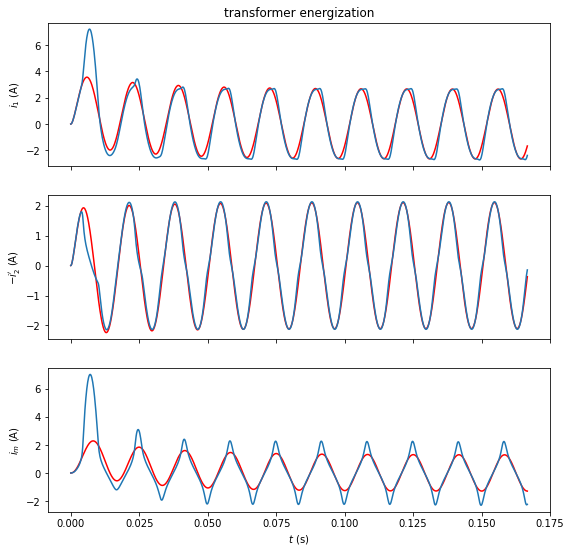

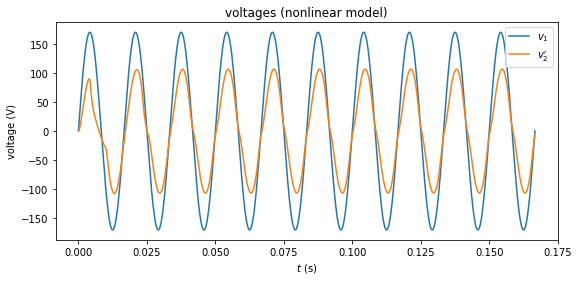

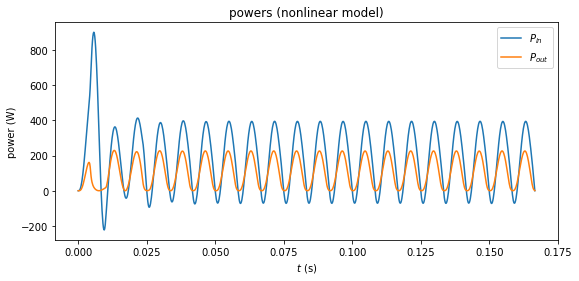

In [ ]:
# Plot currents
plt.figure(figsize=(9,9))

ax = plt.subplot(3,1,1)
plt.plot(t,i_1_lin,'r-')
plt.plot(t,i_1)
plt.ylabel(r'$i_1$ (A)')
ax.set_xticklabels('')
plt.title('transformer energization')

ax = plt.subplot(3,1,2)
plt.plot(t,-i_2p_lin,'r-')
plt.plot(t,-i_2p)
plt.ylabel(r'$-i^\prime_2$ (A)')
ax.set_xticklabels('')

ax = plt.subplot(3,1,3)
plt.plot(t,i_m_lin,'r-')
plt.plot(t,i_m)
plt.ylabel(r'$i_m$ (A)')
plt.xlabel(r'$t$ (s)')


# Plot voltages
plt.figure(figsize=(9,4))
plt.plot(t,v(t),t,-i_2p*r_lp)
plt.ylabel(r'voltage (V)')
plt.xlabel(r'$t$ (s)')
plt.legend([r'$v_{1}$', r'$v^\prime_{2}$'],loc='upper right')
plt.title('voltages (nonlinear model)')


# Plot power in and out
plt.figure(figsize=(9,4))
plt.plot(t,P_in,t,P_out)
plt.ylabel(r'power (W)')
plt.xlabel(r'$t$ (s)')
plt.legend([r'$P_{in}$', r'$P_{out}$'],loc='upper right')
plt.title('powers (nonlinear model)');

###Exercises:

1. Write Python code that decomposes the current and voltage waveforms as a Fourier series. See: https://en.wikipedia.org/wiki/Fourier_series

1. Calculate the total harmonic distortion (THD) in the primary and secondary currents and voltages. See: https://en.wikipedia.org/wiki/Total_harmonic_distortion

1. Study the impact of saturation at other operating points, e.g., by changing the load resistance.

1. Calculate the efficiency of the device,
$$
\eta = \frac{P_\text{out}}{P_\text{in}} \,,
$$
for the given operating point.  Note that the efficiency formula involves average powers. Also, note that we have not included the core loss (hysteresis and eddy current loss) in our dynamic model.
Suppose the core loss is 15 W, and account for this value in the efficiency calculation.

1. Reverse engineer the magnetic circuit: Apply your understanding of magnetic equivalent circuits to determine the actual physical dimensions and design parameters (e.g., number of turns, coil gauge, core permeability, core dimensions, etc) of this device. Try to match the given parameters as closely as possible.  (Do not worry about matching the leakage inductance, which is difficult to estimate.) Assume that the turns ratio is $N_1/N_2 = 5$.

1. Reformulate the dynamic equations for a series-$RLC$ load connected to the secondary.



---


## Conclusion

We simulated the dynamics of a single-phase transformer. We showed a simple way to incorporate the effects of magnetizing path saturation.




